In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"

  # IPython 7.14 deprecated set_matplotlib_formats from IPython
  try:
    from matplotlib_inline.backend_inline import set_matplotlib_formats
  except ImportError:
    # Fall back to deprecated location for older IPython versions
    from IPython.display import set_matplotlib_formats
    
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbWlrZW5ndXllbi9wcm9qZWN0L3RpZHlmaW5hbmNl'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"/opt/anaconda3/lib/python3.13/importlib/_bootstrap.py": 1749745530.584952, "/opt/anaconda3/lib/python3.13/importlib/_bootstrap_external.py": 1749745530.5809522, "/opt/anaconda3/lib/python3.13/zipimport.py": 1749745530.2849557, "/opt/anaconda3/lib/python3.13/codecs.py": 1749745530.164957, "/opt/anaconda3/lib/python3.13/encodings/aliases.py": 1749745530.3809545, "/opt/anaconda3/lib/python3.13/encodings/__init__.py": 1749745530.428954, "/opt/anaconda3/lib/python3.13/encodings/utf_8.py": 1749745530.4809532, "/opt/anaconda3/lib/python3.13/abc.py": 1749745530.1569571, "/opt/anaconda3/lib/python3.13/io.py": 1749745530.2049568, "/opt/anaconda3/lib/python3.13/stat.py": 1749745530.256956, "/opt/anaconda3/lib/python3.13/_collections_abc.py": 1749745530.168957, "/opt/anaconda3/lib/python3.13/genericpath.py": 1749745530.1929567, "/opt/anaconda3/lib/python3.13/posixpath.py": 1749745530.2289565, "/opt/anaconda3/lib/python3.13/os.py": 1749745530.2209566, "/opt/anaconda3/lib/python3.13/_sitebuiltins.

In [2]:
#| label: setup
#| code-summary: Import required libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from dataclasses import dataclass, field
from typing import Optional, List, Tuple
from enum import Enum
import warnings
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.6f}'.format)
print("✓ All libraries loaded.")

✓ All libraries loaded.


In [3]:
import pandas as pd
import sqlite3

tidy_finance = sqlite3.connect(database="data/tidy_finance_python.sqlite")

factors_ff3_daily = pd.read_sql_query(
    sql="SELECT * FROM factors_ff3_daily",
    con=tidy_finance,
    parse_dates=["date"]
)

factors_ff5_daily = pd.read_sql_query(
    sql="SELECT * FROM factors_ff5_daily",
    con=tidy_finance,
    parse_dates=["date"]
)

factors_ff3_monthly = pd.read_sql_query(
    sql="SELECT * FROM factors_ff3_monthly",
    con=tidy_finance,
    parse_dates=["date"]
)

factors_ff5_monthly = pd.read_sql_query(
    sql="SELECT * FROM factors_ff5_monthly",
    con=tidy_finance,
    parse_dates=["date"]
)

In [4]:
prices_monthly = pd.read_sql_query(
    sql="""
        SELECT symbol, date, ret_excess, mktcap, mktcap_lag, risk_free
        FROM prices_monthly
    """,
    con=tidy_finance,
    parse_dates={"date"}
).dropna()

prices_daily = pd.read_sql_query(
    sql="""
        SELECT symbol, date, ret_excess, mktcap, mktcap_lag, risk_free
        FROM prices_daily
    """,
    con=tidy_finance,
    parse_dates={"date"}
).dropna()

In [5]:
#| label: config
#| code-summary: Event study configuration

class RiskModel(Enum):
    """Supported risk models for expected return computation."""
    MARKET_ADJ = "market_adjusted"
    MARKET_MODEL = "market_model"
    FF3 = "ff3"
    CARHART = "carhart"
    FF5 = "ff5"
    CUSTOM = "custom"

@dataclass
class EventStudyConfig:
    """Complete configuration for an event study.
    
    Attributes
    ----------
    estimation_window : int
        Length of estimation period in trading days. Brown and Warner (1985)
        suggest ≥100 days; MacKinlay (1997) recommends 120 as standard.
    event_window_start : int
        Start of event window relative to event date (e.g., -10).
    event_window_end : int
        End of event window relative to event date (e.g., +10).
    gap : int
        Trading days between estimation and event windows. Prevents
        contamination from pre-event information leakage.
    min_estimation_obs : int
        Minimum non-missing returns required in estimation period.
    risk_model : RiskModel
        Risk model for computing expected returns.
    custom_factors : list
        Column names for user-specified factors (CUSTOM model only).
    thin_trading_adj : str or None
        None, 'scholes_williams', or 'dimson'.
    dimson_lags : int
        Number of leads/lags for Dimson (1979) correction.
    """
    estimation_window: int = 150
    event_window_start: int = -10
    event_window_end: int = 10
    gap: int = 15
    min_estimation_obs: int = 120
    risk_model: RiskModel = RiskModel.MARKET_MODEL
    custom_factors: List[str] = field(default_factory=list)
    thin_trading_adj: Optional[str] = None
    dimson_lags: int = 1
    
    @property
    def event_window_length(self) -> int:
        return self.event_window_end - self.event_window_start + 1
    
    def validate(self):
        assert self.estimation_window > 0
        assert self.event_window_start <= self.event_window_end
        assert self.gap >= 0
        assert self.min_estimation_obs <= self.estimation_window
        if self.risk_model == RiskModel.CUSTOM:
            assert len(self.custom_factors) > 0
        return True

# Demonstrate
config_demo = EventStudyConfig(
    estimation_window=150, event_window_start=-10, event_window_end=10,
    gap=15, min_estimation_obs=120, risk_model=RiskModel.FF3
)
config_demo.validate()
print(f"Event window length: {config_demo.event_window_length} days")
print(f"Model: {config_demo.risk_model.value}")

Event window length: 21 days
Model: ff3


In [6]:
#| label: calendar
#| code-summary: Build trading calendar

def build_trading_calendar(trading_dates, config):
    """Build a trading calendar mapping event dates to window boundaries.
    
    For each potential event date, identifies the calendar dates for the
    start/end of the estimation period and event window using only actual
    trading days.
    
    Parameters
    ----------
    trading_dates : array-like
        Sorted unique trading dates in the market.
    config : EventStudyConfig
    
    Returns
    -------
    pd.DataFrame with columns: estper_beg, estper_end, evtwin_beg,
        evtdate, evtwin_end, cal_index
    """
    dates = pd.Series(sorted(pd.to_datetime(trading_dates).unique()))
    n = len(dates)
    
    L1 = config.estimation_window
    G = config.gap
    s = config.event_window_start
    L2 = config.event_window_length
    
    # Offsets (FIRSTOBS logic)
    o0 = 0                      # estper_beg
    o1 = L1 - 1                 # estper_end
    o2 = L1 + G                 # evtwin_beg
    o3 = L1 + G - s             # evtdate
    o4 = L1 + G + L2 - 1        # evtwin_end
    
    max_offset = o4
    valid = n - max_offset
    if valid <= 0:
        raise ValueError(f"Need ≥{max_offset+1} trading dates, have {n}")
    
    cal = pd.DataFrame({
        'estper_beg': dates.iloc[o0:o0+valid].values,
        'estper_end': dates.iloc[o1:o1+valid].values,
        'evtwin_beg': dates.iloc[o2:o2+valid].values,
        'evtdate':    dates.iloc[o3:o3+valid].values,
        'evtwin_end': dates.iloc[o4:o4+valid].values,
    })
    cal['cal_index'] = range(1, len(cal)+1)
    
    # Validate window lengths using a sample row
    idx = min(10, len(cal)-1)
    row = cal.iloc[idx]
    est_n = dates[(dates >= row['estper_beg']) & (dates <= row['estper_end'])].shape[0]
    evt_n = dates[(dates >= row['evtwin_beg']) & (dates <= row['evtwin_end'])].shape[0]
    assert est_n == L1, f"Estimation window: {est_n} ≠ {L1}"
    assert evt_n == L2, f"Event window: {evt_n} ≠ {L2}"
    
    return cal

# Demo
demo_dates = pd.bdate_range('2018-01-01', '2023-12-31', freq='B')
demo_cal = build_trading_calendar(demo_dates, config_demo)
print(f"Calendar: {len(demo_cal)} potential event dates")
print(demo_cal.head(3).to_string(index=False))

Calendar: 1380 potential event dates
estper_beg estper_end evtwin_beg    evtdate evtwin_end  cal_index
2018-01-01 2018-07-27 2018-08-20 2018-09-03 2018-09-17          1
2018-01-02 2018-07-30 2018-08-21 2018-09-04 2018-09-18          2
2018-01-03 2018-07-31 2018-08-22 2018-09-05 2018-09-19          3


In [7]:
#| label: alignment
#| code-summary: Align events to trading calendar

def align_events(events, calendar, id_col='symbol', date_col='event_date'):
    """Align event dates to trading calendar.
    
    Non-trading-day events are shifted forward to the next trading day.
    
    Parameters
    ----------
    events : pd.DataFrame with [id_col, date_col] and optional 'group'
    calendar : pd.DataFrame from build_trading_calendar()
    
    Returns
    -------
    pd.DataFrame with window boundaries for each firm-event
    """
    events = events.copy()
    events[date_col] = pd.to_datetime(events[date_col])
    
    cal_dates = calendar[['evtdate']].drop_duplicates().sort_values('evtdate')
    
    merged = pd.merge_asof(
        events.sort_values(date_col),
        cal_dates.rename(columns={'evtdate': 'aligned_date'}),
        left_on=date_col, right_on='aligned_date',
        direction='forward'
    )
    
    result = merged.merge(calendar, left_on='aligned_date', right_on='evtdate', how='inner')
    
    shifted = (result[date_col] != result['evtdate']).sum()
    if shifted > 0:
        print(f"  {shifted} event(s) shifted to next trading day")
    
    result = result.rename(columns={date_col: 'original_date'})
    result = result.drop_duplicates(subset=[id_col, 'evtdate'])
    
    return result

In [8]:
#| label: extraction
#| code-summary: Extract returns and merge factors

def extract_returns(aligned_events, prices, factors, config,
                    id_col='symbol', date_col='date', ret_col='ret',
                    mkt_col='mkt_excess', rf_col='risk_free'):
    """Extract stock returns and merge risk factors for each event.
    
    For each security-event, retrieves daily returns from estper_beg
    through evtwin_end and merges appropriate risk factors.
    """
    prices = prices.copy()
    factors = factors.copy()
    prices[date_col] = pd.to_datetime(prices[date_col])
    factors[date_col] = pd.to_datetime(factors[date_col])
    
    # Recover raw return from excess return if needed
    if ret_col not in prices.columns and 'ret_excess' in prices.columns:
        if rf_col in factors.columns:
            prices = prices.merge(factors[[date_col, rf_col]].drop_duplicates(),
                                  on=date_col, how='left')
        prices[ret_col] = prices['ret_excess'] + prices[rf_col]
    
    # Factor columns based on model
    model = config.risk_model
    fac_cols = [mkt_col] if mkt_col in factors.columns else []
    if rf_col in factors.columns:
        fac_cols.append(rf_col)
    
    model_factors = {
        RiskModel.FF3: ['smb', 'hml'],
        RiskModel.CARHART: ['smb', 'hml', 'umd'],
        RiskModel.FF5: ['smb', 'hml', 'rmw', 'cma'],
        RiskModel.CUSTOM: config.custom_factors,
    }
    for f in model_factors.get(model, []):
        if f in factors.columns:
            fac_cols.append(f)
    
    fac_cols = list(set([date_col] + fac_cols))
    
    # Vectorized merge approach: join events with prices on id + date range
    frames = []
    for _, evt in aligned_events.iterrows():
        mask = ((prices[id_col] == evt[id_col]) &
                (prices[date_col] >= evt['estper_beg']) &
                (prices[date_col] <= evt['evtwin_end']))
        fd = prices.loc[mask, [id_col, date_col, ret_col]].copy()
        if len(fd) == 0:
            continue
        fd['evtdate'] = evt['evtdate']
        fd['estper_beg'] = evt['estper_beg']
        fd['estper_end'] = evt['estper_end']
        fd['evtwin_beg'] = evt['evtwin_beg']
        fd['evtwin_end'] = evt['evtwin_end']
        if 'group' in evt.index:
            fd['group'] = evt['group']
        frames.append(fd)
    
    if not frames:
        raise ValueError("No return data found for any events")
    
    result = pd.concat(frames, ignore_index=True)
    result = result.merge(factors[fac_cols].drop_duplicates(), on=date_col, how='left')
    
    # Excess and market-adjusted returns
    if rf_col in result.columns:
        result['ret_excess'] = result[ret_col] - result[rf_col]
    else:
        result['ret_excess'] = result[ret_col]
    if mkt_col in result.columns:
        result['ret_mktadj'] = result['ret_excess'] - result[mkt_col]
    
    result = result.sort_values([id_col, 'evtdate', date_col]).reset_index(drop=True)
    n_evts = result.groupby([id_col, 'evtdate']).ngroups
    print(f"  Extracted {len(result):,} obs for {n_evts} firm-events")
    return result

In [9]:
#| label: estimation
#| code-summary: Risk model estimation

def estimate_model(event_returns, config, id_col='symbol',
                   date_col='date', ret_col='ret'):
    """Estimate risk model parameters for each firm-event.
    
    Runs OLS over the estimation window. Returns alpha, betas, sigma,
    R², nobs, and residuals for cross-correlation computation.
    """
    model = config.risk_model
    
    # Define regression specification
    dep_var_map = {
        RiskModel.MARKET_ADJ: 'ret_mktadj',
        RiskModel.MARKET_MODEL: ret_col,
        RiskModel.FF3: 'ret_excess',
        RiskModel.CARHART: 'ret_excess',
        RiskModel.FF5: 'ret_excess',
        RiskModel.CUSTOM: 'ret_excess',
    }
    indep_var_map = {
        RiskModel.MARKET_ADJ: [],
        RiskModel.MARKET_MODEL: ['mkt_excess'],
        RiskModel.FF3: ['mkt_excess', 'smb', 'hml'],
        RiskModel.CARHART: ['mkt_excess', 'smb', 'hml', 'umd'],
        RiskModel.FF5: ['mkt_excess', 'smb', 'hml', 'rmw', 'cma'],
        RiskModel.CUSTOM: config.custom_factors,
    }
    
    dep_var = dep_var_map[model]
    indep_vars = indep_var_map[model]
    
    est = event_returns[
        (event_returns[date_col] >= event_returns['estper_beg']) &
        (event_returns[date_col] <= event_returns['estper_end'])
    ].copy()
    
    params_list = []
    
    for (firm, evtdate), grp in est.groupby([id_col, 'evtdate']):
        valid = grp.dropna(subset=[dep_var] + indep_vars)
        nobs = len(valid)
        if nobs < config.min_estimation_obs:
            continue
        
        y = valid[dep_var].values
        
        if len(indep_vars) == 0:
            # Market-adjusted: intercept-only for variance
            p = {id_col: firm, 'evtdate': evtdate, 'alpha': y.mean(),
                 'sigma': y.std(ddof=1), 'variance': y.var(ddof=1),
                 'nobs': nobs, 'r_squared': 0.0, '_residuals': y - y.mean()}
        else:
            X = sm.add_constant(valid[indep_vars].values)
            res = sm.OLS(y, X).fit()
            p = {id_col: firm, 'evtdate': evtdate,
                 'alpha': res.params[0],
                 'sigma': np.sqrt(res.mse_resid),
                 'variance': res.mse_resid,
                 'nobs': nobs, 'r_squared': res.rsquared,
                 '_residuals': res.resid}
            for j, var in enumerate(indep_vars):
                p[f'beta_{var}'] = res.params[j+1]
        
        params_list.append(p)
    
    if not params_list:
        raise ValueError("No firm-events passed minimum observation filter")
    
    params_df = pd.DataFrame(params_list)
    n_total = event_returns.groupby([id_col, 'evtdate']).ngroups
    print(f"  Estimated {len(params_df)}/{n_total} firm-events "
          f"(mean R² = {params_df['r_squared'].mean():.4f})")
    return params_df

In [10]:
#| label: abnormal-returns
#| code-summary: Compute abnormal returns, CARs, BHARs

def compute_abnormal_returns(event_returns, params, config,
                             id_col='symbol', date_col='date', ret_col='ret'):
    """Compute abnormal returns and aggregate to CARs/BHARs.
    
    Returns
    -------
    daily_ar : pd.DataFrame - daily AR/SAR/CAR/BHAR per firm-event-date
    event_ar : pd.DataFrame - event-level CAR/BHAR/SCAR per firm-event
    """
    model = config.risk_model
    
    factor_map = {
        RiskModel.MARKET_ADJ: [],
        RiskModel.MARKET_MODEL: ['mkt_excess'],
        RiskModel.FF3: ['mkt_excess', 'smb', 'hml'],
        RiskModel.CARHART: ['mkt_excess', 'smb', 'hml', 'umd'],
        RiskModel.FF5: ['mkt_excess', 'smb', 'hml', 'rmw', 'cma'],
        RiskModel.CUSTOM: config.custom_factors,
    }
    factor_cols = factor_map[model]
    
    # Filter to event window
    evt = event_returns[
        (event_returns[date_col] >= event_returns['evtwin_beg']) &
        (event_returns[date_col] <= event_returns['evtwin_end'])
    ].copy()
    
    # Merge params (drop residuals column for merge)
    merge_cols = [c for c in params.columns if c != '_residuals']
    evt = evt.merge(params[merge_cols], on=[id_col, 'evtdate'], how='inner')
    
    # Expected returns
    if model == RiskModel.MARKET_ADJ:
        evt['expected_ret'] = evt.get('mkt_excess', 0) + evt.get('risk_free', 0)
        evt['AR'] = evt[ret_col] - evt['expected_ret']
    else:
        evt['expected_ret'] = evt['alpha']
        for fc in factor_cols:
            bcol = f'beta_{fc}'
            if bcol in evt.columns:
                evt['expected_ret'] += evt[bcol] * evt[fc]
        
        if model == RiskModel.MARKET_MODEL:
            evt['AR'] = evt[ret_col] - evt['expected_ret']
        else:
            evt['AR'] = evt['ret_excess'] - evt['expected_ret']
    
    evt['SAR'] = evt['AR'] / evt['sigma']
    evt = evt.sort_values([id_col, 'evtdate', date_col])
    
    # Compute event time
    all_dates = sorted(event_returns[date_col].unique())
    d2i = {d: i for i, d in enumerate(all_dates)}
    evt['evttime'] = evt[date_col].map(d2i) - evt['evtdate'].map(d2i)
    
    # Cumulative measures per firm-event
    daily_recs = []
    event_recs = []
    
    for (firm, evtdate), g in evt.groupby([id_col, 'evtdate']):
        g = g.sort_values(date_col).copy()
        nd = len(g)
        
        g['CAR'] = g['AR'].cumsum()
        g['cum_ret'] = (1 + g[ret_col]).cumprod() - 1
        g['cum_expected'] = (1 + g['expected_ret']).cumprod() - 1
        g['BHAR'] = g['cum_ret'] - g['cum_expected']
        g['SCAR'] = g['CAR'] / (g['sigma'].iloc[0] * np.sqrt(np.arange(1, nd+1)))
        
        daily_recs.append(g)
        
        last = g.iloc[-1]
        sigma = g['sigma'].iloc[0]
        nobs = g['nobs'].iloc[0]
        
        rec = {id_col: firm, 'evtdate': evtdate,
               'CAR': last['CAR'], 'BHAR': last['BHAR'],
               'cum_ret': last['cum_ret'],
               'SCAR': last['CAR'] / (sigma * np.sqrt(nd)),
               'sigma': sigma, 'variance': g['variance'].iloc[0],
               'nobs': nobs, 'n_event_days': nd,
               'alpha': g['alpha'].iloc[0],
               'pat_scale': (nobs-2)/(nobs-4) if nobs > 4 else np.nan,
               'pos_car': int(last['CAR'] > 0)}
        
        for fc in factor_cols:
            bcol = f'beta_{fc}'
            if bcol in g.columns:
                rec[bcol] = g[bcol].iloc[0]
        if 'group' in g.columns:
            rec['group'] = g['group'].iloc[0]
        
        event_recs.append(rec)
    
    daily_ar = pd.concat(daily_recs, ignore_index=True)
    event_ar = pd.DataFrame(event_recs)
    
    print(f"  {len(event_ar)} firm-events | Mean CAR: {event_ar['CAR'].mean():.6f} | "
          f"Mean BHAR: {event_ar['BHAR'].mean():.6f} | "
          f"% positive: {event_ar['pos_car'].mean():.1%}")
    return daily_ar, event_ar

In [11]:
#| label: tests
#| code-summary: Eight test statistics

def compute_test_statistics(event_ar, params=None, group_col=None):
    """Compute comprehensive test statistics for abnormal returns.
    
    Implements 8 tests with varying assumptions about variance,
    cross-dependence, and distributional form.
    """
    def _stats(data, label=None):
        N = len(data)
        if N < 3:
            return None
        
        cars = data['CAR'].values
        bhars = data['BHAR'].values
        scars = data['SCAR'].values
        pos = data['pos_car'].values
        
        m_car, s_car = np.mean(cars), np.std(cars, ddof=1)
        m_scar, s_scar = np.mean(scars), np.std(scars, ddof=1)
        
        r = {'group': label or 'All', 'N': N,
             'mean_CAR': m_car, 'median_CAR': np.median(cars),
             'std_CAR': s_car, 'mean_BHAR': np.mean(bhars),
             'pct_positive': np.mean(pos)}
        
        # 1. Cross-sectional t
        t1 = m_car / (s_car / np.sqrt(N)) if s_car > 0 else np.nan
        r['t_CS'] = t1
        r['p_CS'] = 2 * (1 - stats.t.cdf(abs(t1), N-1)) if np.isfinite(t1) else np.nan
        
        # 2. Patell Z
        if 'pat_scale' in data.columns:
            ps = data['pat_scale'].dropna().values
            z2 = np.sum(scars[:len(ps)]) / np.sqrt(np.sum(ps)) if len(ps) > 0 else np.nan
        else:
            z2 = m_scar * np.sqrt(N)
        r['Z_Patell'] = z2
        r['p_Patell'] = 2*(1-stats.norm.cdf(abs(z2))) if np.isfinite(z2) else np.nan
        
        # 3. BMP
        t3 = m_scar / (s_scar / np.sqrt(N)) if s_scar > 0 else np.nan
        r['t_BMP'] = t3
        r['p_BMP'] = 2*(1-stats.t.cdf(abs(t3), N-1)) if np.isfinite(t3) else np.nan
        
        # 4. Kolari-Pynnönen
        rbar = 0.0
        if params is not None and '_residuals' in params.columns:
            resids = [row['_residuals'] for _, row in params.iterrows()
                      if isinstance(row.get('_residuals'), np.ndarray)]
            if len(resids) > 1:
                ml = min(len(x) for x in resids)
                aligned = np.column_stack([x[:ml] for x in resids])
                cm = np.corrcoef(aligned.T)
                np.fill_diagonal(cm, 0)
                rbar = cm.sum() / (len(resids) * (len(resids)-1))
        
        adj = np.sqrt(1/(1+(N-1)*rbar)) if (1+(N-1)*rbar) > 0 else 1
        t4 = t3 * adj if np.isfinite(t3) else np.nan
        r['t_KP'] = t4
        r['p_KP'] = 2*(1-stats.t.cdf(abs(t4), N-1)) if np.isfinite(t4) else np.nan
        r['r_bar'] = rbar
        
        # 5. Generalized sign test
        p_hat = np.mean(pos)
        z5 = (p_hat - 0.5) / np.sqrt(0.25 / N)
        r['Z_GSign'] = z5
        r['p_GSign'] = 2*(1-stats.norm.cdf(abs(z5)))
        
        # 6. Sign test
        r['Z_Sign'] = z5  # Same formula with p0=0.5
        r['p_Sign'] = r['p_GSign']
        
        # 7. Skewness-adjusted t
        if s_scar > 0:
            zb = m_scar / s_scar
            gam = stats.skew(scars)
            t7 = np.sqrt(N) * (zb + gam*zb**2/3 + gam**2*zb**3/27 + gam/(6*N))
            r['t_SkAdj'] = t7
            r['p_SkAdj'] = 2*(1-stats.t.cdf(abs(t7), N-1)) if np.isfinite(t7) else np.nan
        
        # 8. Wilcoxon signed-rank
        try:
            w, pw = stats.wilcoxon(cars, alternative='two-sided')
            r['W_Wilcoxon'] = w
            r['p_Wilcoxon'] = pw
        except:
            r['W_Wilcoxon'] = r['p_Wilcoxon'] = np.nan
        
        return r
    
    results = [_stats(event_ar)]
    if group_col and group_col in event_ar.columns:
        for gv, gd in event_ar.groupby(group_col):
            s = _stats(gd, label=gv)
            if s:
                results.append(s)
    
    return pd.DataFrame([r for r in results if r is not None])


def compute_daily_stats(daily_ar, id_col='symbol'):
    """Compute test statistics at each event time t."""
    rows = []
    for t, g in daily_ar.groupby('evttime'):
        n = g[id_col].nunique()
        if n < 2:
            continue
        m_ar = g['AR'].mean()
        s_ar = g['AR'].std(ddof=1)
        t_ar = m_ar / (s_ar/np.sqrt(n)) if s_ar > 0 else np.nan
        rows.append({'evttime': t, 'N': n, 'mean_AR': m_ar,
                     'mean_CAR': g['CAR'].mean(), 'mean_BHAR': g['BHAR'].mean(),
                     'mean_cum_ret': g.get('cum_ret', pd.Series()).mean(),
                     't_AR': t_ar})
    return pd.DataFrame(rows).sort_values('evttime')

In [12]:
#| label: visualization
#| code-summary: Event study plots

def plot_event_study(daily_stats, title="Cumulative Abnormal Returns Around Event Date",
                     figsize=(12, 7), save_path=None):
    """Publication-ready event study plot with CAR, BHAR, and daily AR panels."""
    fig, axes = plt.subplots(2, 1, figsize=figsize, height_ratios=[3, 1],
                              gridspec_kw={'hspace': 0.05})
    ds = daily_stats.sort_values('evttime')
    t = ds['evttime'].values
    
    # Top: cumulative returns
    ax = axes[0]
    ax.plot(t, ds['mean_CAR']*100, color='#2166AC', lw=2.5, label='Mean CAR')
    ax.plot(t, ds['mean_BHAR']*100, color='#B2182B', lw=2, ls='--', label='Mean BHAR')
    if 'mean_cum_ret' in ds.columns:
        ax.plot(t, ds['mean_cum_ret']*100, color='#666', lw=1.5, ls=':', 
                label='Mean Cum. Return', alpha=0.7)
    ax.axvline(0, color='k', lw=0.8, alpha=0.5)
    ax.axhline(0, color='k', lw=0.5, alpha=0.3)
    ax.set_ylabel('Cumulative Return (%)', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.legend(loc='upper left', fontsize=10)
    ax.grid(True, alpha=0.2)
    ax.set_xticklabels([])
    
    # Bottom: daily AR bars
    ax2 = axes[1]
    colors = ['#2166AC' if v >= 0 else '#B2182B' for v in ds['mean_AR']]
    ax2.bar(t, ds['mean_AR']*100, color=colors, alpha=0.7, width=0.8)
    if 't_AR' in ds.columns:
        sig = np.abs(ds['t_AR'].values) > 1.96
        if sig.any():
            ax2.scatter(t[sig], ds['mean_AR'].values[sig]*100, 
                       color='gold', s=40, marker='*', zorder=4, label='p<0.05')
            ax2.legend(fontsize=9)
    ax2.axvline(0, color='k', lw=0.8, alpha=0.5)
    ax2.axhline(0, color='k', lw=0.5, alpha=0.3)
    ax2.set_xlabel('Event Time (Trading Days)', fontsize=12)
    ax2.set_ylabel('Mean AR (%)', fontsize=10)
    ax2.grid(True, alpha=0.2)
    
    for a in axes:
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, dpi=300, bbox_inches='tight')
    return fig


def plot_car_distribution(event_ar, var='CAR', figsize=(12, 5)):
    """Cross-sectional distribution of CARs with histogram and QQ plot."""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    data = event_ar[var].dropna() * 100
    
    ax1.hist(data, bins=50, density=True, alpha=0.6, color='#2166AC', edgecolor='white')
    ax1.axvline(data.mean(), color='k', ls='--', lw=1.5, 
                label=f'Mean={data.mean():.2f}%')
    ax1.axvline(data.median(), color='gray', ls=':', lw=1.5,
                label=f'Median={data.median():.2f}%')
    ax1.set_xlabel(f'{var} (%)')
    ax1.set_ylabel('Density')
    ax1.set_title(f'Distribution of {var}', fontweight='bold')
    ax1.legend()
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # QQ plot
    (osm, osr), (slope, intercept, r) = stats.probplot(data, dist='norm')
    ax2.scatter(osm, osr, alpha=0.4, s=10, color='#2166AC')
    ax2.plot(osm, slope*np.array(osm)+intercept, 'r--', lw=1)
    ax2.set_xlabel('Theoretical Quantiles')
    ax2.set_ylabel('Sample Quantiles')
    ax2.set_title('Q-Q Plot (Normal)', fontweight='bold')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    plt.tight_layout()
    return fig

In [13]:
#| label: master
#| code-summary: Complete event study pipeline

def run_event_study(events, prices, factors, config,
                    id_col='symbol', date_col='date', ret_col='ret',
                    event_date_col='event_date', mkt_col='mkt_excess',
                    rf_col='risk_free', group_col=None, verbose=True):
    """Run a complete event study from raw inputs to test statistics.
    
    This is the main entry point. Provide your events, price data,
    factor data, and configuration—get back everything you need.
    
    Parameters
    ----------
    events : pd.DataFrame
        Columns: [id_col, event_date_col], optional 'group'.
    prices : pd.DataFrame
        Daily returns: [id_col, date_col, ret_col or 'ret_excess', rf_col].
    factors : pd.DataFrame
        Factor returns: [date_col, mkt_col, 'smb', 'hml', ...].
    config : EventStudyConfig
    
    Returns
    -------
    dict with keys: 'config', 'daily_ar', 'event_ar', 'daily_stats',
        'test_stats', 'params'
    """
    config.validate()
    
    if verbose:
        print(f"═══ Event Study: {config.risk_model.value} model ═══")
        print(f"  Windows: estimation={config.estimation_window}, "
              f"gap={config.gap}, event=({config.event_window_start},{config.event_window_end})")
        print(f"  Min obs: {config.min_estimation_obs}\n")
    
    # 1. Trading calendar
    if verbose: print("Step 1: Building trading calendar...")
    trading_dates = pd.Series(sorted(prices[date_col].unique()))
    calendar = build_trading_calendar(trading_dates, config)
    if verbose: print(f"  {len(calendar)} potential event dates\n")
    
    # 2. Align events
    if verbose: print("Step 2: Aligning events to trading calendar...")
    aligned = align_events(events, calendar, id_col, event_date_col)
    if verbose: print(f"  {len(aligned)} aligned events\n")
    
    # 3. Extract returns
    if verbose: print("Step 3: Extracting returns and merging factors...")
    evt_rets = extract_returns(aligned, prices, factors, config,
                               id_col, date_col, ret_col, mkt_col, rf_col)
    if verbose: print()
    
    # 4. Estimate model
    if verbose: print("Step 4: Estimating risk model parameters...")
    params = estimate_model(evt_rets, config, id_col, date_col, ret_col)
    if verbose: print()
    
    # 5. Compute abnormal returns
    if verbose: print("Step 5: Computing abnormal returns...")
    daily_ar, event_ar = compute_abnormal_returns(
        evt_rets, params, config, id_col, date_col, ret_col)
    if verbose: print()
    
    # 6. Test statistics
    if verbose: print("Step 6: Computing test statistics...")
    test_stats = compute_test_statistics(event_ar, params, group_col)
    daily_stats = compute_daily_stats(daily_ar, id_col)
    if verbose:
        print(f"  Done.\n")
        print("═══ Results Summary ═══")
        cols = ['group', 'N', 'mean_CAR', 'mean_BHAR', 'pct_positive',
                't_CS', 'p_CS', 't_BMP', 'p_BMP', 't_KP', 'p_KP']
        avail = [c for c in cols if c in test_stats.columns]
        print(test_stats[avail].to_string(index=False))
    
    return {
        'config': config,
        'params': params,
        'daily_ar': daily_ar,
        'event_ar': event_ar,
        'daily_stats': daily_stats,
        'test_stats': test_stats,
        'calendar': calendar,
    }

print("✓ Master pipeline ready.")

✓ Master pipeline ready.


In [14]:
#| label: simulation
#| code-summary: Generate realistic simulated market data
#| fig-cap: Event study results using simulated data with known abnormal returns

np.random.seed(2024)

# --- Simulated trading calendar (Vietnamese market: ~245 days/year) ---
dates = pd.bdate_range('2019-01-01', '2023-12-31', freq='B')
# Remove Tet + national holidays (simplified)
tet_holidays = pd.to_datetime([
    '2019-02-04','2019-02-05','2019-02-06','2019-02-07','2019-02-08',
    '2020-01-23','2020-01-24','2020-01-27','2020-01-28','2020-01-29',
    '2021-02-10','2021-02-11','2021-02-12','2021-02-15','2021-02-16',
    '2022-01-31','2022-02-01','2022-02-02','2022-02-03','2022-02-04',
    '2023-01-20','2023-01-23','2023-01-24','2023-01-25','2023-01-26',
])
dates = dates.difference(tet_holidays)
T = len(dates)

# --- Simulated factors (realistic Vietnamese market parameters) ---
rf_daily = 0.04 / 252  # ~4% annual risk-free
mkt_excess = np.random.normal(0.0003, 0.012, T)  # ~7.5% annual, ~19% vol
smb = np.random.normal(0.0001, 0.006, T)
hml = np.random.normal(0.0001, 0.005, T)
rmw = np.random.normal(0.00005, 0.004, T)
cma = np.random.normal(0.00005, 0.004, T)

factors_sim = pd.DataFrame({
    'date': dates, 'mkt_excess': mkt_excess, 'smb': smb, 'hml': hml,
    'rmw': rmw, 'cma': cma, 'risk_free': rf_daily
})

# --- 100 simulated stocks ---
n_stocks = 100
symbols = [f'SIM{i:03d}' for i in range(n_stocks)]
betas = np.random.uniform(0.5, 1.5, n_stocks)
alphas = np.random.normal(0, 0.0002, n_stocks)
idio_vols = np.random.uniform(0.015, 0.035, n_stocks)

price_rows = []
for i, sym in enumerate(symbols):
    eps = np.random.normal(0, idio_vols[i], T)
    rets = alphas[i] + betas[i] * mkt_excess + 0.3*smb + 0.2*hml + eps
    for j in range(T):
        price_rows.append({
            'symbol': sym, 'date': dates[j], 'ret': rets[j],
            'ret_excess': rets[j] - rf_daily,
            'risk_free': rf_daily,
            'mktcap': np.random.uniform(100, 5000),
        })

prices_sim = pd.DataFrame(price_rows)

# --- Simulated events: 50 random firm-dates with KNOWN positive AR ---
event_indices = np.random.choice(range(250, T-50), 50, replace=False)
event_firms = np.random.choice(symbols, 50, replace=True)
event_dates_sim = [dates[i] for i in event_indices]

# Inject abnormal returns on event date (2% positive shock)
for firm, edate in zip(event_firms, event_dates_sim):
    mask = (prices_sim['symbol'] == firm) & (prices_sim['date'] == edate)
    prices_sim.loc[mask, 'ret'] += 0.02
    prices_sim.loc[mask, 'ret_excess'] += 0.02

events_sim = pd.DataFrame({
    'symbol': event_firms,
    'event_date': event_dates_sim,
    'group': np.random.choice([1, 2], 50)
})

print(f"Simulated data: {n_stocks} stocks × {T} days = {len(prices_sim):,} obs")
print(f"Events: {len(events_sim)} firm-event pairs")
print(f"Injected abnormal return: +2% on event date")

Simulated data: 100 stocks × 1279 days = 127,900 obs
Events: 50 firm-event pairs
Injected abnormal return: +2% on event date


In [15]:
#| label: run-pipeline
#| code-summary: Execute the event study

config = EventStudyConfig(
    estimation_window=150,
    event_window_start=-10,
    event_window_end=10,
    gap=15,
    min_estimation_obs=120,
    risk_model=RiskModel.FF3
)

results = run_event_study(
    events=events_sim,
    prices=prices_sim,
    factors=factors_sim,
    config=config,
    group_col='group'
)

═══ Event Study: ff3 model ═══
  Windows: estimation=150, gap=15, event=(-10,10)
  Min obs: 120

Step 1: Building trading calendar...
  1094 potential event dates

Step 2: Aligning events to trading calendar...
  50 aligned events

Step 3: Extracting returns and merging factors...


  Extracted 9,300 obs for 50 firm-events

Step 4: Estimating risk model parameters...
  Estimated 50/50 firm-events (mean R² = 0.2368)

Step 5: Computing abnormal returns...


  50 firm-events | Mean CAR: 0.033009 | Mean BHAR: 0.032498 | % positive: 60.0%

Step 6: Computing test statistics...
  Done.

═══ Results Summary ═══
group  N  mean_CAR  mean_BHAR  pct_positive     t_CS     p_CS    t_BMP    p_BMP     t_KP     p_KP
  All 50  0.033009   0.032498      0.600000 2.288362 0.026468 2.157106 0.035929 2.161291 0.035587
    1 20  0.030704   0.028326      0.650000 1.568676 0.133227 1.248382 0.227056 1.249320 0.226720
    2 30  0.034545   0.035280      0.566667 1.688848 0.101975 1.734699 0.093413 1.736689 0.093055


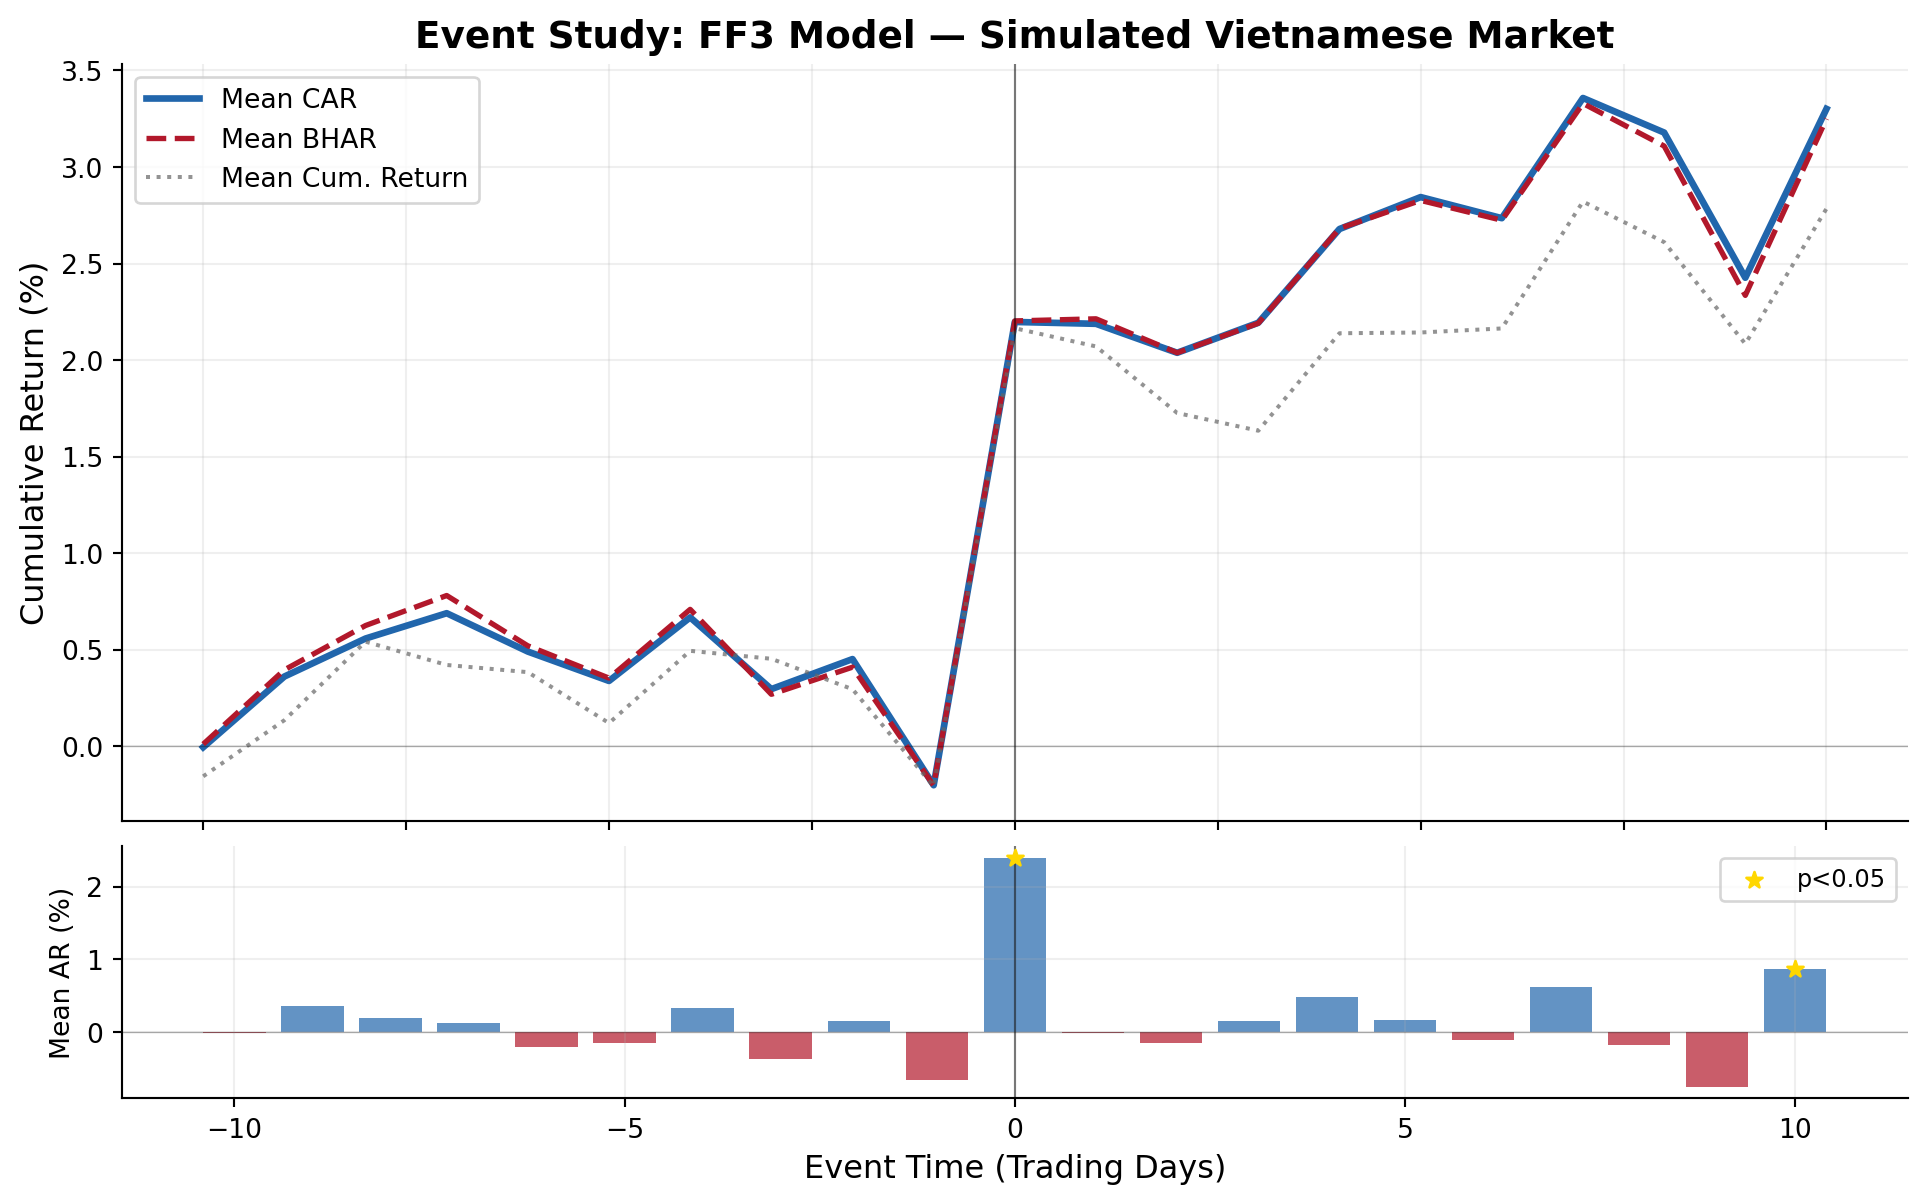

In [16]:
#| label: fig-car-dynamics
#| fig-cap: Dynamics of cumulative abnormal returns (CARs) and buy-and-hold abnormal returns (BHARs) around the event date. The positive jump at t=0 reflects the injected 2% abnormal return.

fig1 = plot_event_study(
    results['daily_stats'],
    title="Event Study: FF3 Model — Simulated Vietnamese Market"
)
plt.show()

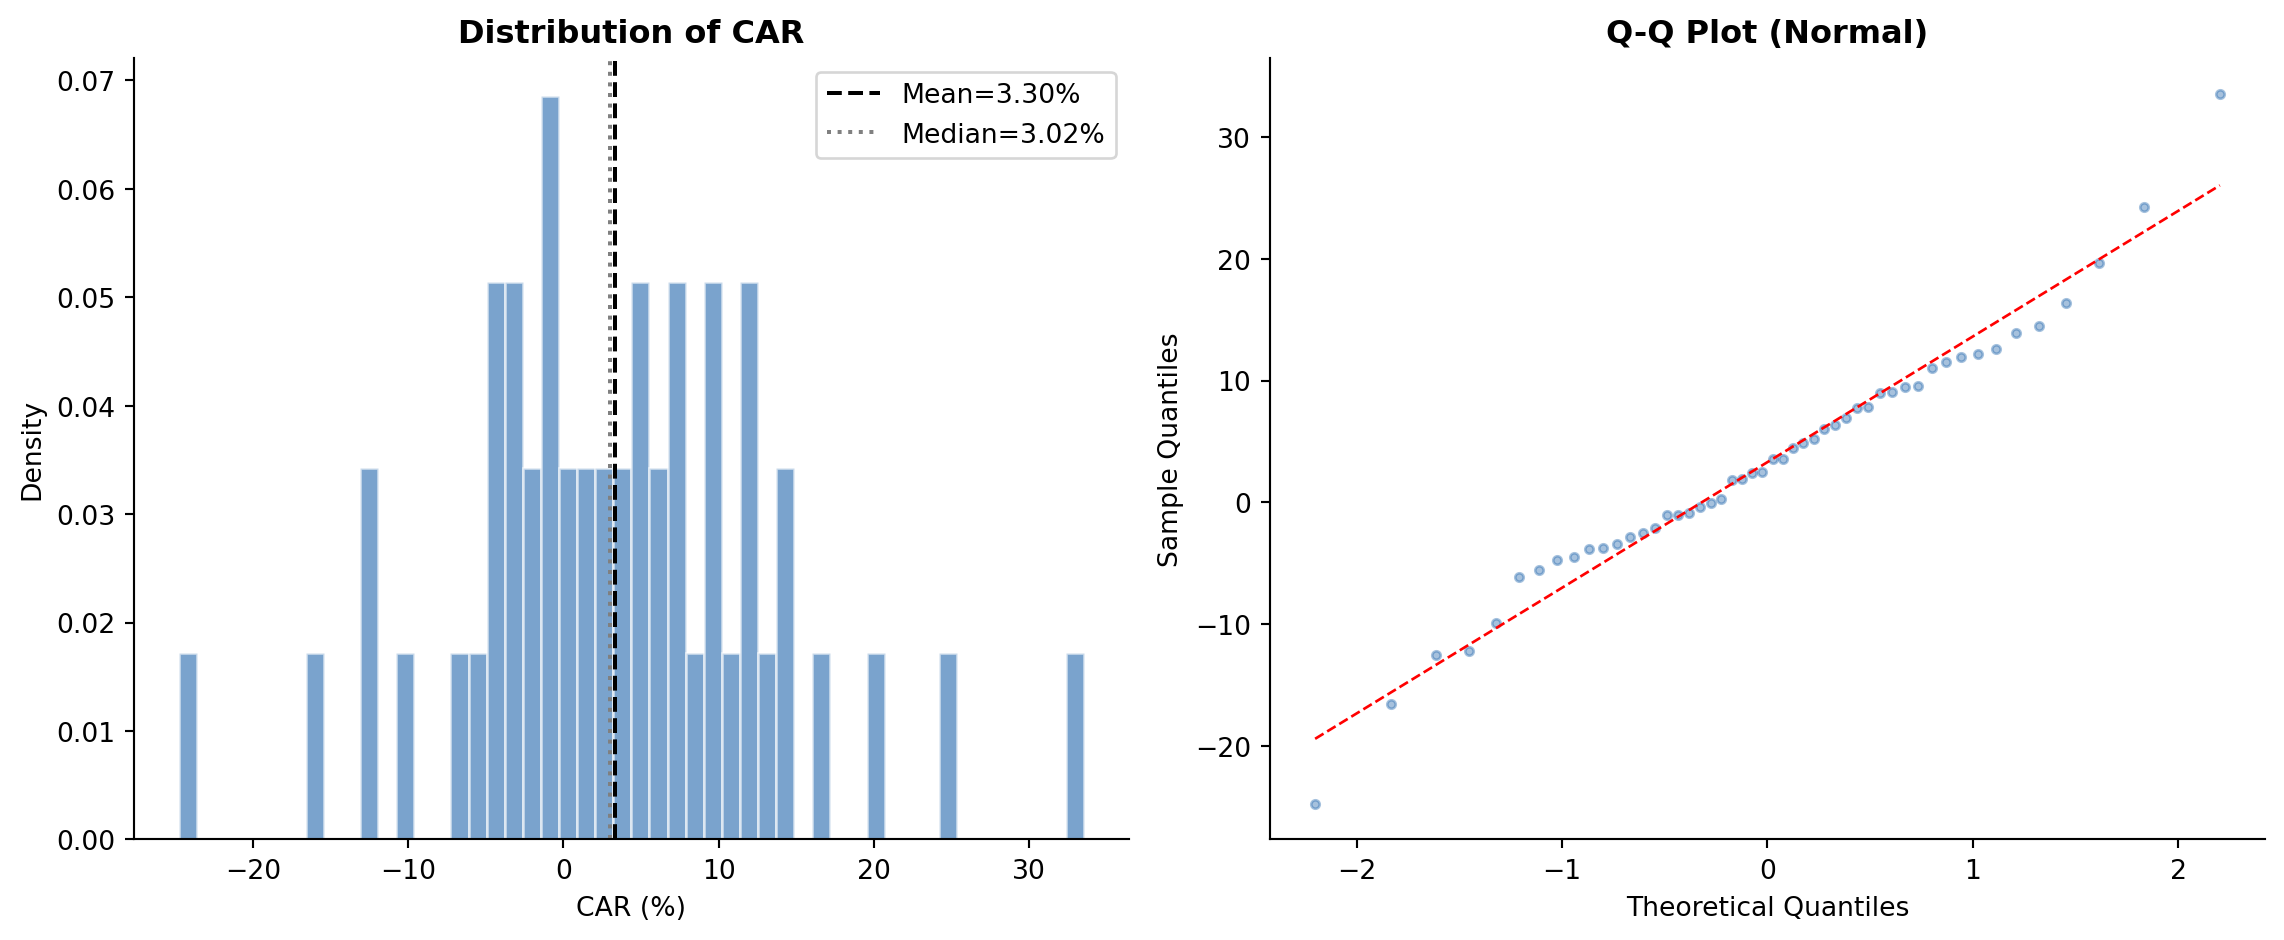

In [17]:
#| label: fig-car-distribution
#| fig-cap: Cross-sectional distribution of cumulative abnormal returns. The rightward shift from zero and positive skewness are consistent with the injected positive event effect.

fig2 = plot_car_distribution(results['event_ar'], 'CAR')
plt.show()

In [18]:
#| label: tbl-test-results
#| tbl-cap: Event study test statistics for the full sample and by subgroup

# Format for display
ts = results['test_stats'].copy()

# Select key columns
display_cols = ['group', 'N', 'mean_CAR', 'mean_BHAR', 'pct_positive',
                't_CS', 'p_CS', 'Z_Patell', 'p_Patell',
                't_BMP', 'p_BMP', 't_KP', 'p_KP',
                'Z_GSign', 'p_GSign', 't_SkAdj', 'p_SkAdj']
avail = [c for c in display_cols if c in ts.columns]
display_df = ts[avail].copy()

# Format
for c in display_df.columns:
    if c in ['N']:
        display_df[c] = display_df[c].astype(int)
    elif c.startswith('p_'):
        display_df[c] = display_df[c].map(lambda x: f'{x:.4f}' if pd.notna(x) else '')
    elif c in ['mean_CAR', 'mean_BHAR']:
        display_df[c] = display_df[c].map(lambda x: f'{x:.4%}' if pd.notna(x) else '')
    elif c == 'pct_positive':
        display_df[c] = display_df[c].map(lambda x: f'{x:.1%}' if pd.notna(x) else '')
    elif isinstance(display_df[c].iloc[0], (int, float, np.floating)):
        display_df[c] = display_df[c].map(lambda x: f'{x:.3f}' if pd.notna(x) else '')

print(display_df.to_string(index=False))

group  N mean_CAR mean_BHAR pct_positive  t_CS   p_CS Z_Patell p_Patell t_BMP  p_BMP  t_KP   p_KP Z_GSign p_GSign t_SkAdj p_SkAdj
  All 50  3.3009%   3.2498%        60.0% 2.288 0.0265    1.832   0.0669 2.157 0.0359 2.161 0.0356   1.414  0.1573   2.074  0.0434
    1 20  3.0704%   2.8326%        65.0% 1.569 0.1332    1.020   0.3075 1.248 0.2271 1.249 0.2267   1.342  0.1797   1.103  0.2836
    2 30  3.4545%   3.5280%        56.7% 1.689 0.1020    1.532   0.1255 1.735 0.0934 1.737 0.0931   0.730  0.4652   1.727  0.0949


In [19]:
#| label: multi-model
#| code-summary: Run event study across all available models

models_to_run = [
    ("Market-Adjusted", RiskModel.MARKET_ADJ),
    ("Market Model", RiskModel.MARKET_MODEL),
    ("Fama-French 3", RiskModel.FF3),
    ("Fama-French 5", RiskModel.FF5),
]

robustness = []
for name, mdl in models_to_run:
    cfg = EventStudyConfig(
        estimation_window=150, event_window_start=-10, event_window_end=10,
        gap=15, min_estimation_obs=120, risk_model=mdl
    )
    res = run_event_study(events_sim, prices_sim, factors_sim, cfg, verbose=False)
    ts = res['test_stats']
    full = ts[ts['group'] == 'All'].iloc[0]
    robustness.append({
        'Model': name,
        'N': int(full['N']),
        'Mean CAR': f"{full['mean_CAR']:.4%}",
        'Mean BHAR': f"{full['mean_BHAR']:.4%}",
        '% Positive': f"{full['pct_positive']:.1%}",
        't (CS)': f"{full['t_CS']:.2f}",
        't (BMP)': f"{full['t_BMP']:.2f}",
        't (KP)': f"{full.get('t_KP', np.nan):.2f}",
    })

rob_df = pd.DataFrame(robustness)
print("Robustness Across Risk Models:")
print(rob_df.to_string(index=False))

  Extracted 9,300 obs for 50 firm-events
  Estimated 50/50 firm-events (mean R² = 0.0000)


  50 firm-events | Mean CAR: 0.029672 | Mean BHAR: 0.026468 | % positive: 62.0%


  Extracted 9,300 obs for 50 firm-events
  Estimated 50/50 firm-events (mean R² = 0.2198)


  50 firm-events | Mean CAR: 0.033785 | Mean BHAR: 0.029974 | % positive: 62.0%


  Extracted 9,300 obs for 50 firm-events
  Estimated 50/50 firm-events (mean R² = 0.2368)


  50 firm-events | Mean CAR: 0.033009 | Mean BHAR: 0.032498 | % positive: 60.0%


  Extracted 9,300 obs for 50 firm-events
  Estimated 50/50 firm-events (mean R² = 0.2516)


  50 firm-events | Mean CAR: 0.036479 | Mean BHAR: 0.036000 | % positive: 64.0%
Robustness Across Risk Models:
          Model  N Mean CAR Mean BHAR % Positive t (CS) t (BMP) t (KP)
Market-Adjusted 50  2.9672%   2.6468%      62.0%   2.12    2.03   2.01
   Market Model 50  3.3785%   2.9974%      62.0%   2.37    2.26   2.28
  Fama-French 3 50  3.3009%   3.2498%      60.0%   2.29    2.16   2.16
  Fama-French 5 50  3.6479%   3.6000%      64.0%   2.51    2.36   2.41
